In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Dataset

heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Checking any Null values or missing values

heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Box Plot

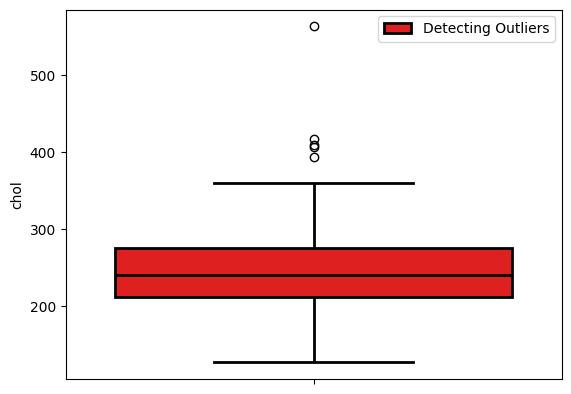

In [4]:
sns.boxplot(heart_disease['chol'], color = 'red', linecolor='black', linewidth= 2)
plt.legend(['Detecting Outliers']);

In [5]:
# Removing Outlier rows

outliers = heart_disease[heart_disease['chol'] > 380].index
heart_disease = heart_disease.drop(outliers)

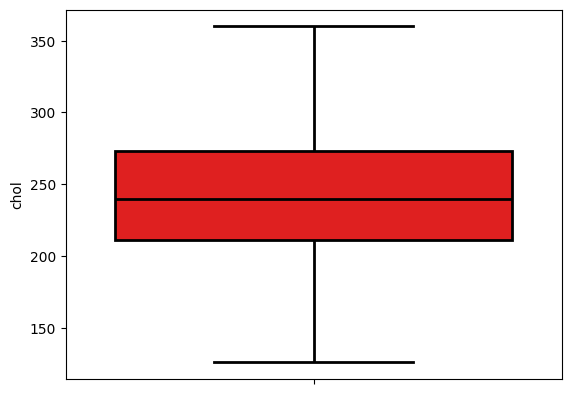

In [6]:
# No Outliers
sns.boxplot(heart_disease['chol'], color = 'red', linecolor='black', linewidth= 2 );

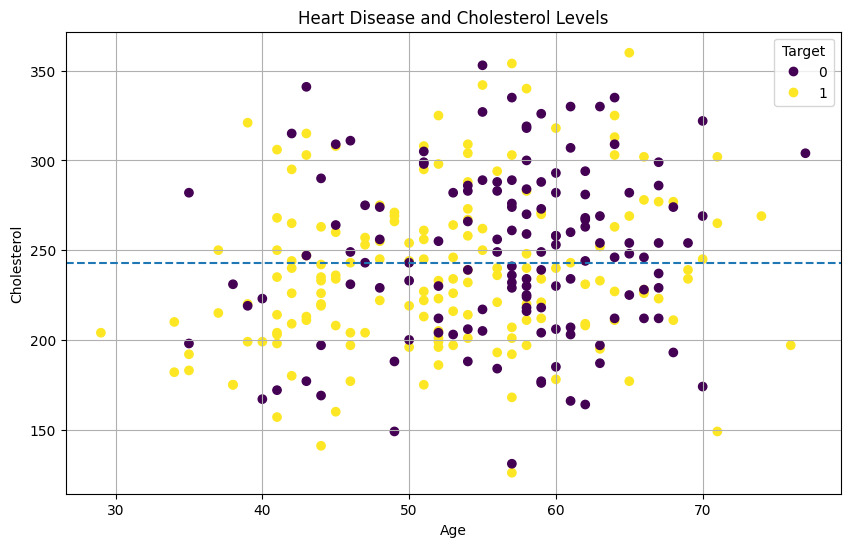

In [7]:
# Detecting Death Rates based on Age and Cholesterol levels

fix, ax = plt.subplots(figsize = (10,6))

ax.grid(True)

scatter = ax.scatter(x = heart_disease['age'], y = heart_disease['chol'], c = heart_disease['target'])

ax.set(title = 'Heart Disease and Cholesterol Levels', xlabel = 'Age', ylabel = 'Cholesterol')

ax.legend(*scatter.legend_elements(), title = 'Target')

ax.axhline(heart_disease['chol'].mean(), linestyle = '--');
# heart_disease.plot(kind = 'scatter', x = 'age', y = 'chol', c = 'target', ax = ax);

# Violin Plot

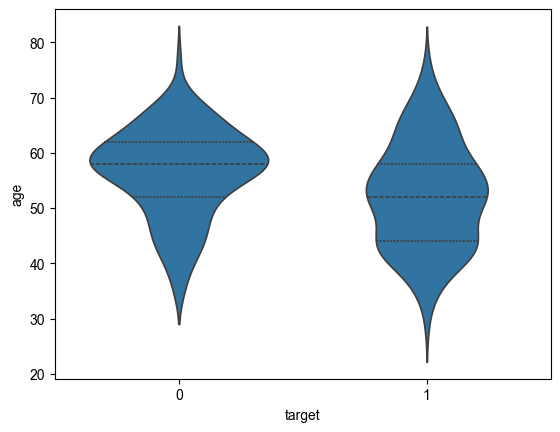

In [8]:
sns.violinplot(data = heart_disease, y =  'age', x = 'target', inner = 'quart', gap = .1)
sns.set_style("whitegrid")
plt.show()

# Training Models

In [9]:
x = heart_disease.drop('target', axis = 1)

y = heart_disease['target']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Model - 1 Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier   # RandomForest  ---->   Reduce Overfitting
clf = RandomForestClassifier()

In [12]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [14]:
clf.score(x_train, y_train)

1.0

In [15]:
clf.score(x_test, y_test)

0.8333333333333334

In [16]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_preds)

0.8333333333333334

In [17]:
# Trying the model with different estimators

np.random.seed(42)

for i in range(150, 300, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set:{clf.score(x_test, y_test) * 100:.2f}")
    print("---" * 30)

Trying model with 150 estimators...
Model accuracy on test set:80.00
------------------------------------------------------------------------------------------
Trying model with 160 estimators...
Model accuracy on test set:81.67
------------------------------------------------------------------------------------------
Trying model with 170 estimators...
Model accuracy on test set:83.33
------------------------------------------------------------------------------------------
Trying model with 180 estimators...
Model accuracy on test set:83.33
------------------------------------------------------------------------------------------
Trying model with 190 estimators...
Model accuracy on test set:83.33
------------------------------------------------------------------------------------------
Trying model with 200 estimators...
Model accuracy on test set:81.67
------------------------------------------------------------------------------------------
Trying model with 210 estimators...
Mode

# Model- 2 Regressor

In [18]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [19]:
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum() 

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [20]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")   
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),      
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [22]:
car_sales_filled = pd.DataFrame(filled_x, columns = ["Make", "Colour","Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [23]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_filled) 

In [27]:
np.random.seed(42)  
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

# Model -3 LinearSVC

In [28]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
from sklearn.svm import LinearSVC                        

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearSVC(max_iter=100000) # Till it reaches convergence (minimum loss function)
model.fit(X_train, y_train)

model.score(X_test, y_test)

C:\Users\91730\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\91730\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

# Model -4 RandomizedSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split":[2, 4, 6],
        "min_samples_leaf":[1, 2, 4]}

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1) # -1 = all processors

# Setup of RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions = grid,
                            n_iter = 10,
                            cv=5,
                            verbose=2)


rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; tot

C:\Users\91730\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91730\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91730\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\91730\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

In [32]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels
    on a classifiacation model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dist = {"accuracy": round(accuracy, 2), "precision": round (precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision:{precision * 100:.2f}%")
    print(f"Recall:{recall * 100:.2f}%")
    print(f"F1:{f1 * 100:.2f}%")

    return metric_dist

In [33]:
# Hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluation
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc:45.90%
Precision:50.00%
Recall:48.48%
F1:49.23%
